# k-Means Clustering


We begin with the standard imports:

In [ ]:
########################################### Imports ###########################################

%matplotlib inline
import matplotlib.pyplot as plt   # interface to matplotlib for plots
import seaborn as sns; sns.set()  # Seaborn is a Python data visualization library based on matplotlib
import numpy as np                # The fundamental package for scientific computing with Python

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

The "**cluster center**" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.
Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization.

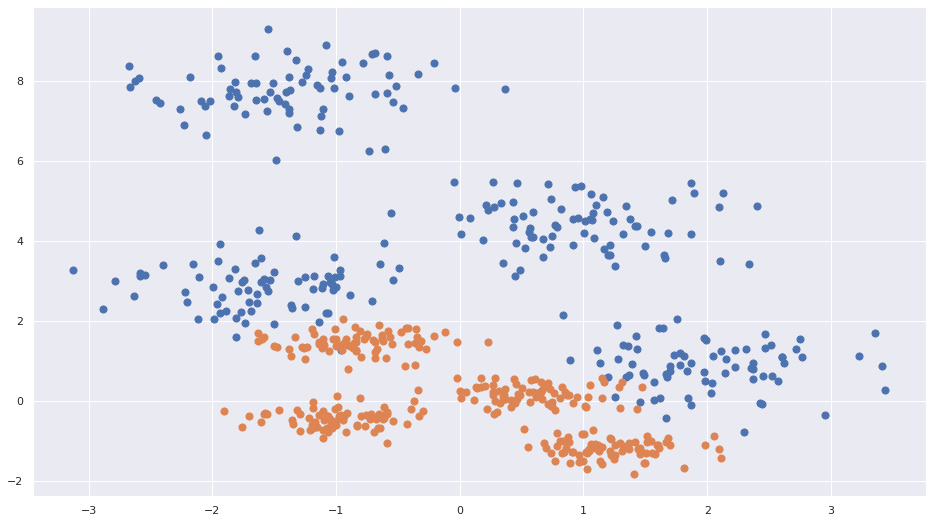

In [ ]:
########################################### Generate Data ###########################################
from sklearn.datasets import make_blobs               # Generate isotropic Gaussian blobs for clustering

# X: The generated samples
# y_true: The integer labels for cluster membership of each sample
X, y_true = make_blobs(n_samples=300,                 # If int, it is the total number of points equally divided among clusters
                       centers=4,                     # The number of centers to generate
                       cluster_std=0.60,              # The standard deviation of the clusters
                       random_state=0)                # Pass an int for reproducible output across
                                                      # n_features: default is 2

plt.scatter(X[:, 0],                                  # a scatter plot of X[:, 0] vs X[:, 1]
            X[:, 1],
            s=50);                                    # the marker size

########################################### Transform Data ###########################################
from sklearn.preprocessing import StandardScaler      # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(X)                                             # Compute the mean and std to be used for later scaling

X_std = sc.transform(X)                               # Perform standardization of X by centering and scaling
plt.scatter(X_std[:, 0],                              # a scatter plot of standardized X[:, 0] vs X[:, 1]
            X_std[:, 1],
            s=50);


By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [ ]:
########################################### K-Means clustering ###########################################
from sklearn.cluster import KMeans # K-Means clustering Class

kmeans = KMeans(n_clusters=4,      # n_clusters: the number of clusters to form as well as the number of centroids to generate
                n_init=10)         # default value is 10. n_init captures the number of time the k-means algorithm will be run
                                   # with different centroid seeds. The final results will be the best output of n_init consecutive
                                   # runs in terms of inertia

kmeans.fit(X_std)                  # perform K-Means clustering to standardized data
y_kmeans = kmeans.predict(X_std)   # predict the closest cluster each sample in X belongs to

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

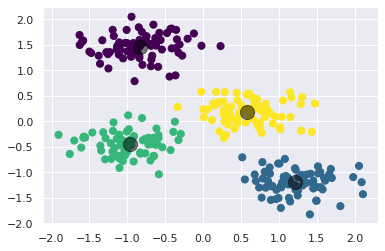

In [ ]:
################################# Visualize K-Means clustering results #######################################

# Visualize each identified cluster with a different color
plt.scatter(X_std[:, 0],          # a scatter plot of X_std[:, 0] vs X_std[:, 1]
            X_std[:, 1],
            c=y_kmeans,           # each cluster visualized with a different color
            s=50,                 # the marker size
            cmap='viridis')       # set of colors to use

centers = kmeans.cluster_centers_ # coordinates of cluster centers

plt.scatter(centers[:, 0],        # visualize the centers of the clusters
            centers[:, 1],
            c='black',            # aesthetic parameter: color
            s=200,                # aesthetic parameter: marker size
            alpha=0.5)            # aesthetic parameter: color transparency

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly. Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to k-means involves an intuitive iterative approach known as expectation–maximization.



#k-Means Clustering (3D Visualization)


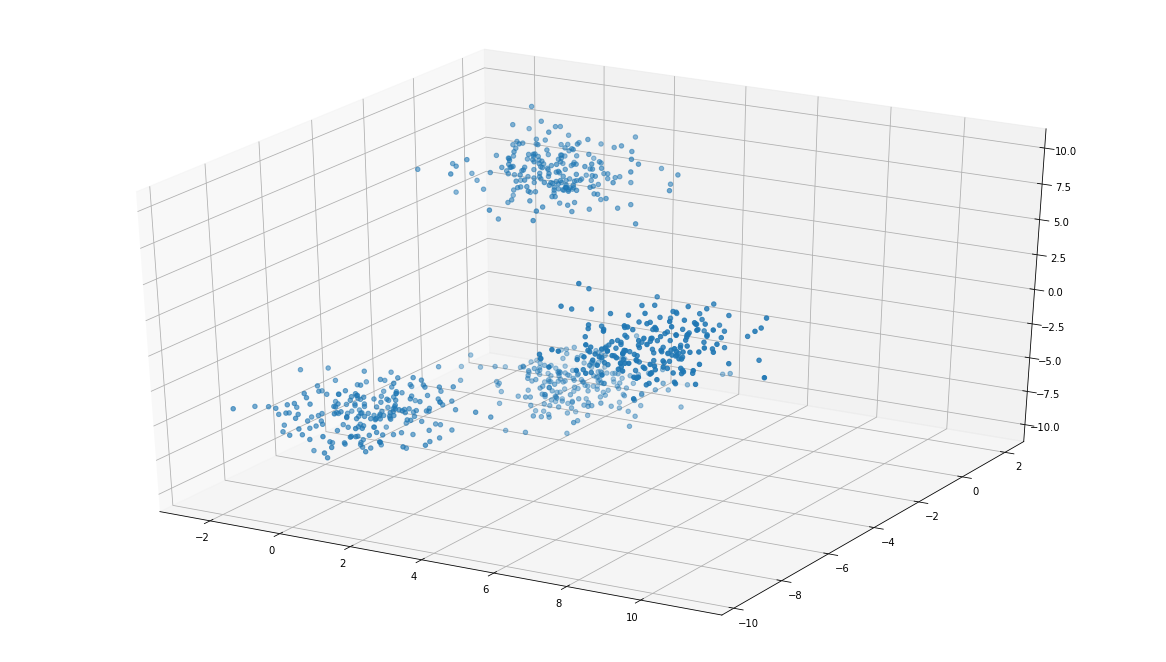

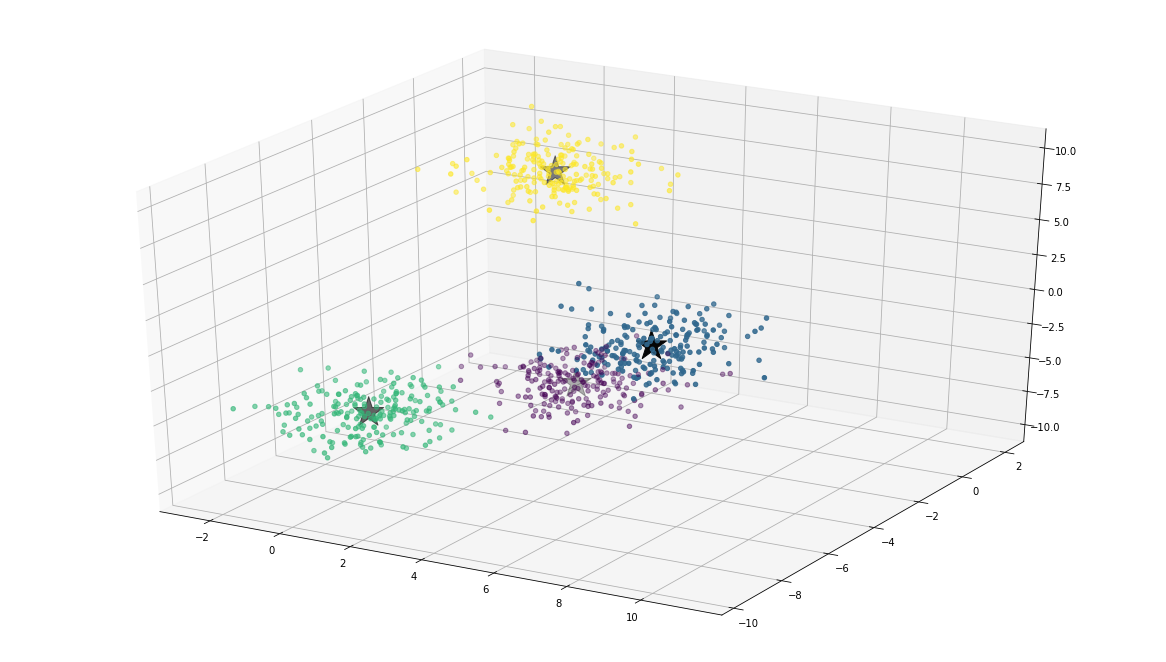

In [ ]:
######################################## k-means Clustering  ########################################

import numpy as np                         # The fundamental package for scientific computing with Python
import matplotlib.pyplot as plt            # interface to matplotlib for plots
from mpl_toolkits.mplot3d import Axes3D    # Generating 3D plots using the mplot3d toolkit
from sklearn.cluster import KMeans         # K-Means clustering Class
from sklearn.datasets import make_blobs    # Generate isotropic Gaussian blobs for clustering

plt.rcParams['figure.figsize'] = (16, 9)   # Set Figure Size

# Creating a sample dataset with three features and 4 clusters
X, y = make_blobs(n_samples=800,
                  n_features=3,
                  centers=4)

fig = plt.figure()
ax = Axes3D(fig)                          # Generate 3D plot
ax.scatter(X[:, 0],                       # Scatter plot for 3D plot
           X[:, 1],
           X[:, 2])


#sc = StandardScaler()
#sc.fit(X)                                             # Compute the mean and std to be used for later scaling
#X_std = sc.transform(X)                               # Perform standardization of X by centering and scaling

# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)                            # Predict the closest cluster each sample in X belongs to
# Getting the cluster centers
C = kmeans.cluster_centers_                           # Coordinates of cluster centers

# Optional - You don't need to know how to visualize
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0],                                   # Visualize raw data
           X[:, 1],
           X[:, 2],
           c=y)

ax.scatter(C[:, 0],                                    # Visualize cluster centers
           C[:, 1],
           C[:, 2],
           marker='*',
           c='#050505',
           s=1000)

# Optimal Number of Clusters

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 for instance), and for each value of k calculate the sum of squared errors (SSE) as shown below.

Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

800


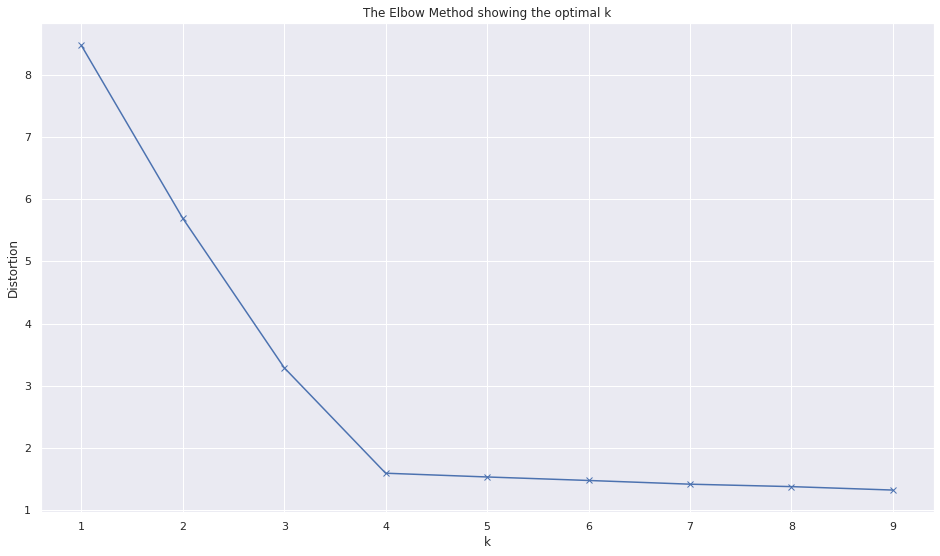

In [ ]:
######################################## k-means Elbow Method  ########################################


# Elbow method
from scipy.spatial.distance import cdist # Compute distance between each pair of the two collections of inputs

distortions = []
K = range(1,10)
for k in K:                                     # k means clustering with various numbers of clusters
    kmeanModel = KMeans(n_clusters=k)           # Initialize
    kmeanModel.fit(X)                           # Fit k means clustering to data
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) # Estimate distortion
                                                # Distortion: sum of squared distances of points from cluster centers

# Plot the elbow
plt.plot(K, distortions, 'bx-')                 # Plot of distrortion estimates for each k mean clustering fit to the data
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


# k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach here consists of the following procedure:

Guess some cluster centers

Repeat until converged

* E-Step: assign points to the nearest cluster center
* M-Step: set the cluster centers to the mean


Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure. For the particular initialization shown here, the clusters converge in just three iterations.

Text(0.98, 0.98, 'Final Clustering')

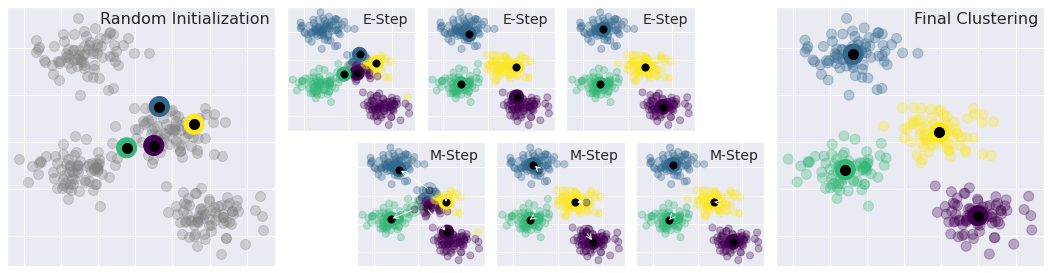

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)

def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])

    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)

    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))


    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)

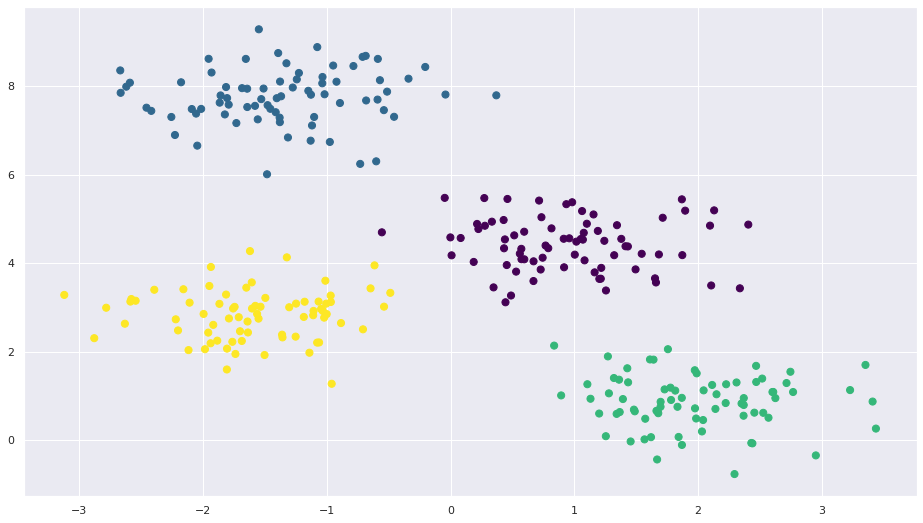

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');